In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [1]:
data = pd.read_table('C:/Users/91898/Downloads/DS290922A-main/DATA WRANGLING/data-science-complete-tutorial-master/data-science-complete-tutorial-master/Data/house_rental_data.txt', sep = ',')
data

<IPython.core.display.Javascript object>

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
# drop the irrelevant columns
data = data.drop(['Unnamed: 0'], axis=1)


In [4]:
data = data.fillna(data.mean())


In [5]:
data = (data - data.mean()) / data.std()


In [6]:
print(data.head())


       Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0 -0.456039 -1.014110   -0.771748 -0.828313     0.402381  0.276703  0.000370
1  0.791184 -0.241854   -0.771748  1.150435     0.402381  0.276703  0.449365
2 -0.507041 -0.241854   -0.771748 -0.828313     0.402381 -1.186196 -0.111879
3 -0.089754 -1.014110   -0.771748  0.161061     0.402381  0.276703 -0.476688
4 -0.729594  1.302659    0.629314  0.161061     0.402381  0.276703 -0.476688


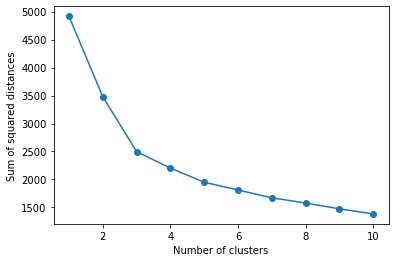

In [14]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)

# store the cluster labels along with the original data
data['Cluster'] = kmeans.labels_

# display the clustered data
print(data.head())

       Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price  \
0 -0.456039 -1.014110   -0.771748 -0.828313     0.402381  0.276703  0.000370   
1  0.791184 -0.241854   -0.771748  1.150435     0.402381  0.276703  0.449365   
2 -0.507041 -0.241854   -0.771748 -0.828313     0.402381 -1.186196 -0.111879   
3 -0.089754 -1.014110   -0.771748  0.161061     0.402381  0.276703 -0.476688   
4 -0.729594  1.302659    0.629314  0.161061     0.402381  0.276703 -0.476688   

   Cluster  
0        2  
1        2  
2        1  
3        2  
4        2  
